# Script for histograms of (Green and red) fluorescent intensity in RGB images

In [ ]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from scipy.interpolate import BSpline, make_interp_spline

In [ ]:
#Functions
def HisTograms(image, xlim, ylim, mini, maxi):
    #Convert to RGB and create the heatmap
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #Create histograms
    histo_red = cv2.calcHist(images = [imageRGB], channels = [0], mask = None, histSize = [256], ranges = [mini,maxi])
    plt.plot(histo_red, color = 'red')

    histo_green = cv2.calcHist(images = [imageRGB], channels = [1], mask = None, histSize = [256], ranges = [mini,maxi])
    plt.plot(histo_green, color = 'green')

    histo_blue = cv2.calcHist(images = [imageRGB], channels = [2], mask = None, histSize = [256], ranges = [mini,maxi],)
    plt.plot(histo_blue, color = 'blue')

    plt.ylabel("count pixels")
    plt.xlabel("value of pixel")
    plt.xlim(0,xlim)
    plt.ylim(0,ylim)

    return plt.show()

def HisTogramsReg(image, tissue, bins, ylim, xlim):
    imageRGB = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

    data = {'red channel': [], 'green channel': [], 'distance': []}
    i = 1
    green_intensity = 0
    red_intensity = 0
    #Take data from channels
    for h in range(imageRGB.shape[0]):
        for w in range(imageRGB.shape[1]):
            if i == h:
                green_mean = green_intensity / imageRGB.shape[1]
                red_mean = red_intensity / imageRGB.shape[1]
                data['red channel'].append(red_mean)
                data['green channel'].append(green_mean)
                data['distance'].append(h - 1)

                i = i + 1
                green_intensity = 0
                red_intensity = 0
            green_intensity = green_intensity + imageRGB[h,w,1]
            red_intensity = red_intensity + imageRGB[h,w,0]

    #Create dataframe
    df = pd.DataFrame(data)

    #convert distance pixels into micrometers
    df['distance'] = df['distance'] * 140 / 800

    #plot graph
    distancedata = np.array(df['distance'])
    reddata = np.array(df['red channel'])
    greendata = np.array(df['green channel'])

    new_x = np.linspace(0,ylim,bins)
    red_BSpline = make_interp_spline(distancedata, reddata)
    green_BSpline = make_interp_spline(distancedata, greendata)
    red_y = red_BSpline(new_x)
    green_y = green_BSpline(new_x)

    plt.figure(figsize = (5, 15))
    plt.plot(np.flip(red_y), new_x, 'r')
    plt.plot(np.flip(green_y), new_x, 'g')
    plt.ylim(0, ylim)
    plt.xlim(0, xlim)
    plt.ylabel('{} thickness (micras)'.format(tissue), fontsize = 20)
    plt.xlabel('Channel intensity (AU)', fontsize = 20)

    return df, plt.show()

# Working section

<Figure size 720x720 with 0 Axes>

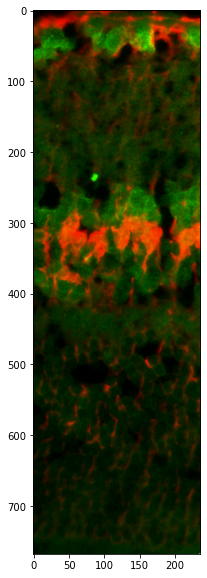

In [ ]:
file_name = 'RETINA SHAM SE.tif'
path = 'C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\Coinmunos\\BDNF-GS\\fotos procesadas\\RETINA\\TEMPORAL\\{}'.format(file_name)
ret = cv2.imread(path)

plt.figure(figsize = (10,10))
imageRGB = cv2.cvtColor(ret, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(imageRGB)

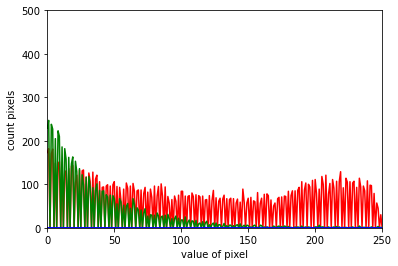

In [ ]:
HisTograms(ret, 250, 500, 100, 256)

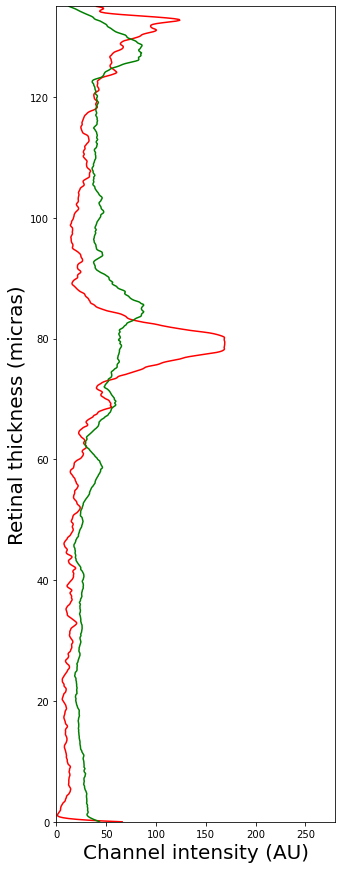

,red channel,green channel,distance
0,40.283898,12.855932,0.000
1,45.605932,15.406780,0.175
2,47.656780,18.216102,0.350
3,45.673729,20.686441,0.525
4,43.860169,22.491525,0.700
...,...,...,...
762,3.072034,31.902542,133.350
763,2.292373,31.703390,133.525
764,1.601695,30.953390,133.700
765,1.072034,30.838983,133.875


In [ ]:
data, plot = HisTogramsReg(ret, 'Retinal', 1000, 135, 280)
data